# CLASIFICADOR DE IMAGENES

# DATOS

In [1]:
import pandas as pd
import os
import numpy as np
import zipfile
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import load_model

2025-01-09 19:22:05.844024: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-09 19:22:06.330194: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 19:22:15.198725: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 19:22:18.216135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736450542.021182    1495 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736450543.24

In [2]:
# import zipfile

# zip_doc = "/workspaces/clasificacion_imagenes_PuraCampos/data/raw/train.zip"
# extraer_en="/workspaces/clasificacion_imagenes_PuraCampos/data/processed"

# def extraer_archivos(nombre_archivo_zip, directorio_destino):
#     with zipfile.ZipFile(nombre_archivo_zip, 'r') as archivo_zip:
#         archivo_zip.extractall(directorio_destino)

# extraer_archivos(zip_doc,extraer_en)


In [3]:
# zip_doc = "/workspaces/clasificacion_imagenes_PuraCampos/data/raw/test1.zip"
# extraer_en="/workspaces/clasificacion_imagenes_PuraCampos/data/processed"

# def extraer_archivos(nombre_archivo_zip, directorio_destino):
#     with zipfile.ZipFile(nombre_archivo_zip, 'r') as archivo_zip:
#         archivo_zip.extractall(directorio_destino)

# extraer_archivos(zip_doc,extraer_en)


# VISUALIZACIÓN DE IMAGENES

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Ruta de la carpeta donde están las imágenes
image_folder = '/workspaces/clasificacion_imagenes_PuraCampos/data/processed/train'

# Inicializar las listas para las imágenes de gatos y perros
cat = []
dog = []

# Obtener la lista de archivos en la carpeta y asignar a las listas correspondientes
for f in os.listdir(image_folder):
    if 'cat' in f.lower():  # Si el nombre contiene 'cat', lo agregamos a la lista de gatos
        cat.append(f)
    elif 'dog' in f.lower():  # Si el nombre contiene 'dog', lo agregamos a la lista de perros
        dog.append(f)

# Mostrar las imágenes (opcional)
print(f"Imágenes de gatos: {cat[:9]}")
print(f"Imágenes de perros: {dog[:9]}")



Imágenes de gatos: ['cat.8151.jpg', 'resized_cat.11606.jpg', 'resized_cat.3668.jpg', 'resized_cat.9007.jpg', 'cat.11032.jpg', 'cat.10682.jpg', 'resized_cat.5473.jpg', 'cat.4108.jpg', 'cat.12303.jpg']
Imágenes de perros: ['resized_dog.5218.jpg', 'dog.7395.jpg', 'resized_resized_dog.7640.jpg', 'resized_resized_dog.2955.jpg', 'dog.2752.jpg', 'resized_dog.410.jpg', 'resized_dog.2952.jpg', 'resized_dog.7926.jpg', 'dog.10901.jpg']


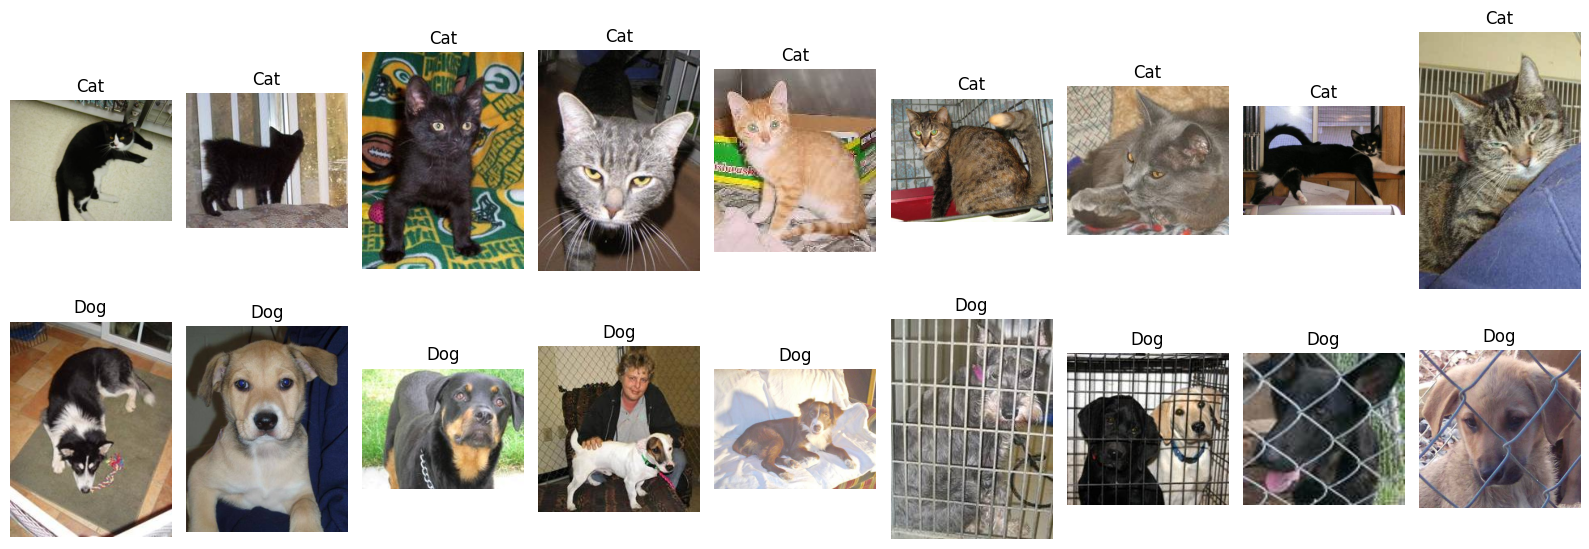

In [5]:
# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(2, 9, figsize=(16, 6))

# Mostrar imágenes de gatos
for ax, image_file in zip(axes[0], cat):
    image_path = os.path.join(image_folder, image_file)
    image = Image.open(image_path)
    ax.imshow(image)
    ax.axis('off')  
    ax.set_title('Cat')  

# Mostrar imágenes de perros
for ax, image_file in zip(axes[1], dog):
    image_path = os.path.join(image_folder, image_file)
    image = Image.open(image_path)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title('Dog')

# Ajustar el espacio entre las imágenes
plt.tight_layout()
plt.show()

Normalización de las imagenes: tamaño fijo de 200x200 píxeles.

In [6]:
import cv2

# Carpetas de entrada y salida
input_dir = "../data/processed/train"
output_dir = "../data/processed"
os.makedirs(output_dir, exist_ok=True)

# Procesar imágenes
image_size = (200, 200)
categories = ['cat', 'dog']

# Crear carpetas de salida para cada categoría
for category in categories:
    os.makedirs(os.path.join(output_dir, category), exist_ok=True)

# Redimensionar y mover las imágenes
for filename in os.listdir(input_dir):
    category = 'cat' if 'cat' in filename else 'dog'
    img_path = os.path.join(input_dir, filename)
    img = cv2.imread(img_path)
    if img is not None:
        img_resized = cv2.resize(img, image_size)
        save_path = os.path.join(output_dir, category, filename)
        cv2.imwrite(save_path, img_resized)

print("Todas las imágenes han sido redimensionadas y clasificadas.")

Todas las imágenes han sido redimensionadas y clasificadas.


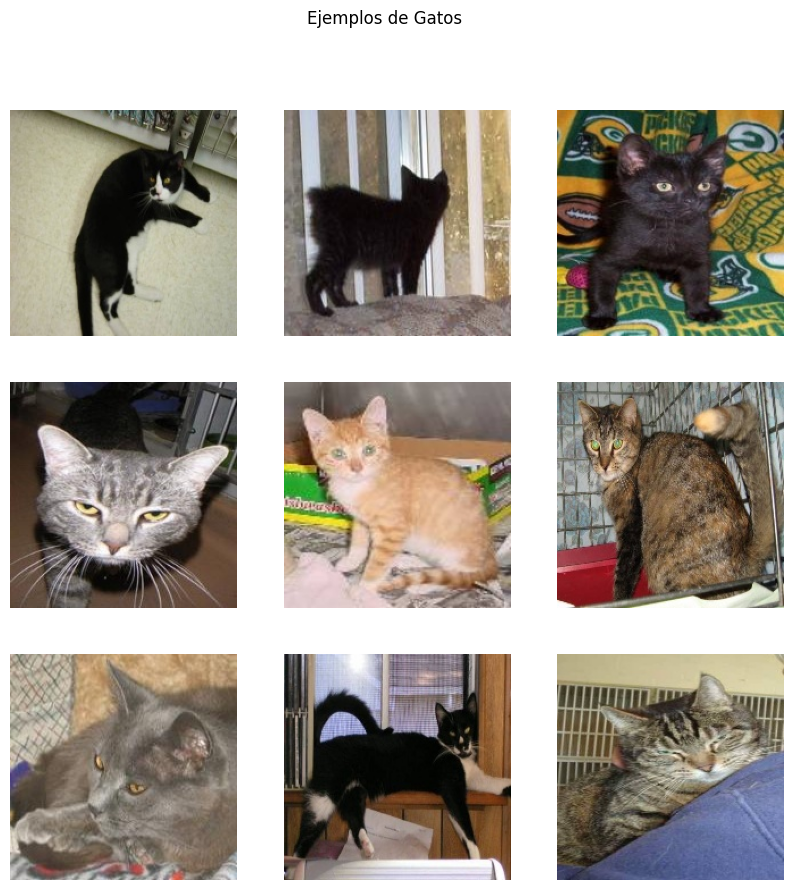

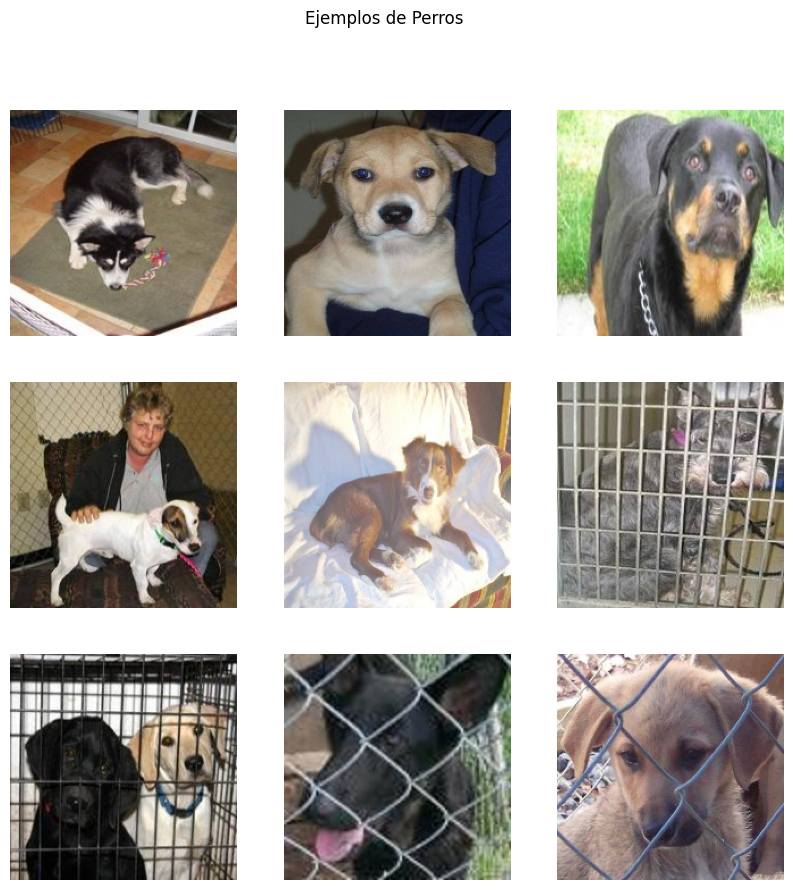

In [7]:
cat_images = [os.path.join(output_dir, "cat", img) for img in os.listdir(os.path.join(output_dir, "cat"))[:9]]
dog_images = [os.path.join(output_dir, "dog", img) for img in os.listdir(os.path.join(output_dir, "dog"))[:9]]

def plot_images(image_paths, title):
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(image_paths):
        plt.subplot(3, 3, i + 1)
        img = cv2.imread(img_path)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

plot_images(cat_images, "Ejemplos de Gatos")
plot_images(dog_images, "Ejemplos de Perros")

# CNN. RED NEURONAL

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir algunas reglas para DataGen
train_dir = "../data/raw"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Generación de datos de entrenamiento
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Generación de datos de prueba
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test"] 
)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 1 classes.


: 

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import set_random_seed

# Crear el modelo
model = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(200, 200, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(2, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-09 19:26:08.389527: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
# Compilar el modelo con Adam 
from keras.optimizers import Adam

# Compilar el modelo antes del entrenamiento
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [ ]:
train_dir = "../data/processed"
datagen = ImageDataGenerator(validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=(200, 200), batch_size=32, class_mode='categorical', subset='training')

validation_generator = datagen.flow_from_directory(
    train_dir, target_size=(200, 200), batch_size=32, class_mode='categorical', subset='validation')

# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=2,
    validation_data=validation_generator
)

In [14]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Precisión en el conjunto de validación: {accuracy * 100:.2f}%")

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 200, 200, 3), dtype=float32). Expected shape (None, 200, 200), but input has incompatible shape (None, 200, 200, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 200, 200, 3), dtype=float32)
  • training=False
  • mask=None